Reading in the data

In [1]:
import pandas as pd
train=pd.read_csv("train.tsv", delimiter='\t')
y=train['Sentiment'].values
X=train['Phrase'].values

Train test split and show data shapes

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(93636,) (93636,) (62424,) (62424,)
almost in a class with that of Wilde
3
escape movie
2


Showing Class Distribution

In [3]:
training_labels = set(y_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_train)
print(training_category_dist)

{0, 1, 2, 3, 4}
[[    0  4141]
 [    1 16449]
 [    2 47718]
 [    3 19859]
 [    4  5469]]


In [4]:
testing_labels = set(y_test)
print(testing_labels)
testing_category_dist = itemfreq(y_test)
print(testing_category_dist)


{0, 1, 2, 3, 4}
[[    0  2931]
 [    1 10824]
 [    2 31864]
 [    3 13068]
 [    4  3737]]


Vectorize

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english', ngram_range=(1, 1))
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)

import numpy as np

Build Models

In [6]:
from sklearn.naive_bayes import MultinomialNB
# import the LinearSVC module
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

mnb = MultinomialNB()
lin_svc = LinearSVC()

score = []

mnb.fit(X_train_vec, y_train)
score.append(mnb.score(X_test_vec, y_test))

lin_svc.fit(X_train_vec, y_train)
score.append(lin_svc.score(X_test_vec, y_test))

In [7]:
models = ['Multinomial Naive Bayes', 'Linear Support Vector Machine']

for i,j in zip(models, score):
    print('Accuracy for {}: {}%'.format(i, np.round(j* 100,2)))

Accuracy for Multinomial Naive Bayes: 58.36%
Accuracy for Linear Support Vector Machine: 62.54%


In [8]:
feature_ranks = sorted(zip(lin_svc.coef_[0], unigram_tfidf_vectorizer.get_feature_names()))

## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
very_negative_10 = feature_ranks[-10:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

feature_ranks = sorted(zip(lin_svc.coef_[4], unigram_tfidf_vectorizer.get_feature_names()))
## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_negative_10 = feature_ranks[-10:]
print("Positive words")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()

Very negative words
(2.098745524605588, 'stinks')
(2.1727441861556014, 'worthless')
(2.1798300535190975, 'worst')
(2.1800488133108624, 'distasteful')
(2.2009510686483065, 'unwatchable')
(2.2123856971708524, 'unbearable')
(2.238137825043866, 'meaningless')
(2.4621467094133798, 'stinker')
(2.5442745310983668, 'disappointment')
(2.563483172171112, 'disgusting')

Positive words
(2.2486557705119186, 'phenomenal')
(2.2841723636274565, 'masterpiece')
(2.3433885257084137, 'magnificent')
(2.352451486318256, 'stunning')
(2.354476196742644, 'miraculous')
(2.3737043540320197, 'masterfully')
(2.376399463522625, 'glorious')
(2.381295242411694, 'masterful')
(2.390828121488659, 'zings')
(2.468221447306822, 'perfection')



In [9]:
# Your code starts here
ratios = (mnb.feature_log_prob_[0]/mnb.feature_log_prob_[4])
feature_ranks = sorted(zip(ratios,unigram_tfidf_vectorizer.get_feature_names()))
botton_features = feature_ranks[0:10]
top_features = feature_ranks[-10:]
print("Top Features:")
[print(x[0],x[1]) for x in reversed(top_features) ]
print("Bottom Features:")
[print(x[0],x[1]) for x in botton_features]

Top Features:
1.5455295526446657 best
1.5275180369015378 moving
1.5220467986739947 beautiful
1.5042949131728902 beautifully
1.4723329465164048 touching
1.4716110795291075 excellent
1.4600241208924587 terrific
1.4586896637436464 powerful
1.4476005932359128 fascinating
1.4418258452675978 remarkable
Bottom Features:
0.5696241694233448 bad
0.6087269892625203 worst
0.6705127954632845 stupid
0.6764508789088829 mess
0.6840558490880838 awful
0.6945048190327225 waste
0.7015816915592267 unfunny
0.7071649244857492 dull
0.7104968819815105 worse
0.7157005375918319 failure


[None, None, None, None, None, None, None, None, None, None]

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



                   precision    recall  f1-score   support

         Negative       0.57      0.04      0.07      2931
somewhat negative       0.51      0.24      0.33     10824
          Neutral       0.60      0.90      0.72     31864
Somewhat positive       0.52      0.37      0.43     13068
          Postive       0.62      0.05      0.09      3737

      avg / total       0.57      0.58      0.53     62424



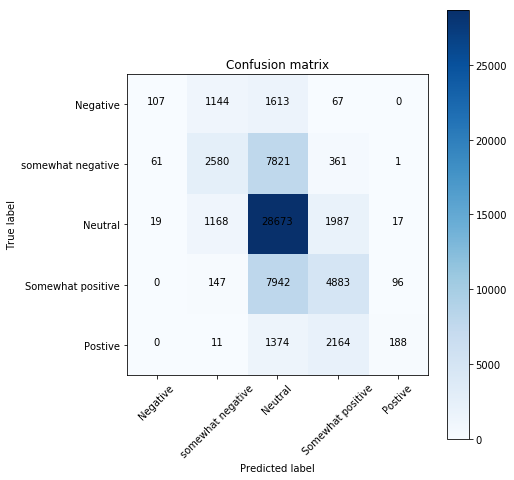

In [11]:
ypred = mnb.predict(X_test_vec)
confusion_mtx = confusion_matrix(y_test, ypred)

from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
plot_confusion_matrix(confusion_mtx,  classes = ['Negative', 'somewhat negative', 'Neutral', 'Somewhat positive', 'Postive'])
print(classification_report(y_test, ypred, target_names  =['Negative', 'somewhat negative', 'Neutral', 'Somewhat positive', 'Postive']))

                   precision    recall  f1-score   support

         Negative       0.51      0.27      0.35      2931
somewhat negative       0.51      0.40      0.45     10824
          Neutral       0.69      0.83      0.75     31864
Somewhat positive       0.53      0.48      0.50     13068
          Postive       0.53      0.30      0.39      3737

      avg / total       0.61      0.63      0.61     62424



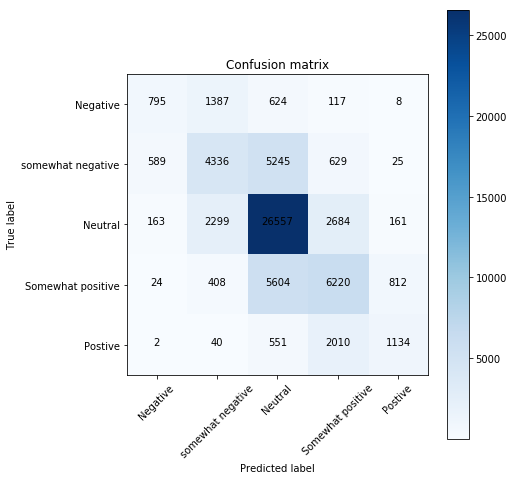

In [12]:
ypred = lin_svc.predict(X_test_vec)
confusion_mtx = confusion_matrix(y_test, ypred)

from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
plot_confusion_matrix(confusion_mtx,  classes = ['Negative', 'somewhat negative', 'Neutral', 'Somewhat positive', 'Postive'])
print(classification_report(y_test, ypred, target_names  =['Negative', 'somewhat negative', 'Neutral', 'Somewhat positive', 'Postive']))

In [22]:
train=pd.read_csv("train.tsv", delimiter='\t')
y=train['Sentiment'].values
X=train['Phrase'].values

unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english', ngram_range=(1, 1))
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X)


from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings


ex_param_grid = {
    "penalty": ['l2'],
    "loss": ['squared_hinge'],
    'tol': [.0001,.001],
    
}

gsExtC = GridSearchCV(
    lin_svc,
    param_grid=ex_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=4,
    verbose=1)

gsExtC.fit(X_train_vec, y)
ExtC_best = gsExtC.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   13.9s finished


In [24]:
ExtC_best.score(X_train_vec, y)

0.7045943867743175

In [23]:
import pandas as p
# read in the test data
kaggle_test=p.read_csv("test.tsv", delimiter='\t') 

# preserve the id column of the test examples
kaggle_ids=kaggle_test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=kaggle_test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec=unigram_tfidf_vectorizer.transform(kaggle_X_test)

# predict using the NB classifier that we built
kaggle_pred= ExtC_best.predict(kaggle_X_test_vec)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()